In [13]:
import pandas as pd
import altair as alt
import seaborn as sns

In [14]:
df = sns.load_dataset('iris')

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [23]:
chart = alt.Chart(df)

In [26]:
chart = alt.Chart(df).mark_point().encode(
x = 'sepal_length',
y = 'petal_length',
tooltip='species'
).interactive()

chart

alt.Chart(...)

In [36]:
interval = alt.selection_interval(encodings=['x'])

chart = alt.Chart(df).mark_bar().encode(

    x='sepal_length',

    y='petal_length',
    
    tooltip = 'species'

).add_selection(interval)

chart

alt.Chart(...)

In [37]:
line_width = alt.binding_range(min = 1, max = 5, step = 1)
line_width_slider = alt.selection_single(fields=['line_width'], bind=line_width, name='Line Width')
chart = alt.Chart(df).mark_line().encode(

    x='sepal_length',

    y='petal_length',

    strokeWidth=alt.condition(line_width_slider, alt.value(2), alt.value(1))  # Условное изменение ширины линии

).add_selection(line_width_slider)

chart

alt.Chart(...)

In [39]:
data = pd.DataFrame({
    'year': [2010, 2011, 2012, 2013, 2014],
    'value': [10, 15, 13, 17, 20]
})

# Создаем объект Chart и указываем данные
chart = alt.Chart(data)

# Описываем тип графика (линейный) и кодируем данные
chart.mark_line().encode(
    x='year',
    y='value'
).interactive()

alt.Chart(...)

In [42]:
# Создаем DataFrame с данными
data = pd.DataFrame({'value': [4, 5, 2, 7, 6, 8, 3, 5, 7, 4, 6, 5, 6, 7, 3, 4, 5, 6, 8, 9]})

# Создаем объект Chart и указываем данные
chart = alt.Chart(data)

# Описываем тип графика (гистограмма) и кодируем данные
chart.mark_bar().encode(
    alt.X('value:Q', bin=True),  # bin=True указывает, что данные следует разделить на интервалы
    alt.Y('count():Q')
)

alt.Chart(...)

In [44]:
# Создаем DataFrame с данными
data = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [10, 5, 8, 2, 7]})

# Создаем объект Chart и указываем данные
chart = alt.Chart(data)

# Описываем тип графика (точечный) и кодируем данные
chart.mark_point().encode(
    x='x',
    y='y'
).configure_mark(
    color='red',  # Изменяем цвет точек
    size=100  # Изменяем размер точек
).configure_axis(
    labelFontSize=14,  # Изменяем размер шрифта на осях
    titleFontSize=16  # Изменяем размер шрифта заголовка
).interactive()

alt.Chart(...)

In [47]:
# Создаем DataFrame с данными
data = pd.DataFrame({
    'Product': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Region': ['X', 'X', 'Y', 'Y', 'Z', 'Z'],
    'Sales': [100, 150, 120, 80, 200, 180]
})

# Создаем объект Chart и указываем данные
chart = alt.Chart(data)

# Группируем данные по продукту и региону, агрегируя сумму продаж
grouped_chart = chart.mark_bar().encode(
    x='Product:N',
    y='sum(Sales):Q',
    color='Region:N',
    tooltip='Region:N'
)

grouped_chart

alt.Chart(...)

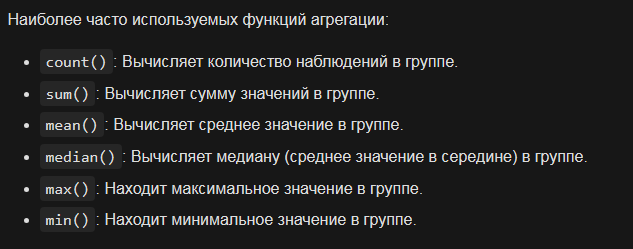

In [49]:
import altair as alt
import pandas as pd
import panel as pn

# Создаем DataFrame с данными о продажах
data = pd.DataFrame({
    'Category': ['Electronics', 'Books', 'Clothing', 'Electronics', 'Books', 'Clothing'],
    'Region': ['North', 'North', 'North', 'South', 'South', 'South'],
    'Sales': [1000, 800, 1200, 600, 750, 900]
})

# Создаем функцию для создания интерактивных графиков
def create_chart(category=None, region=None):
    filtered_data = data
    if category:
        filtered_data = filtered_data[filtered_data['Category'] == category]
    if region:
        filtered_data = filtered_data[filtered_data['Region'] == region]

    chart = alt.Chart(filtered_data).mark_bar().encode(
        x='Category',
        y='sum(Sales)',
        color='Region',
    ).properties(
        title=f'Sales by Category and Region'
    )
    return chart

# Создаем выпадающие списки для выбора категории и региона
categories = ['Electronics', 'Books', 'Clothing']
regions = ['North', 'South']

category_selector = pn.widgets.Select(name='Select Category', options=categories)
region_selector = pn.widgets.Select(name='Select Region', options=regions)

# Создаем интерактивный дашборд
@pn.depends(category_selector.param.value, region_selector.param.value)
def update_dashboard(category, region):
    chart = create_chart(category, region)
    return chart

# Создаем панель дашборда
dashboard = pn.Column(
    category_selector,
    region_selector,
    update_dashboard
)

# Запускаем дашборд
dashboard.servable()

ModuleNotFoundError: No module named 'panel'